In [170]:
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.filters import gaussian
from skimage.morphology import dilation,erosion,remove_small_objects,remove_small_holes
from skimage.segmentation import flood
from skimage.transform import hough_line, hough_line_peaks
from matplotlib import pyplot as plt
from skimage.util import invert
import numpy as np
import rawpy

In [27]:
img = '/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/example_for_codeTest.png'

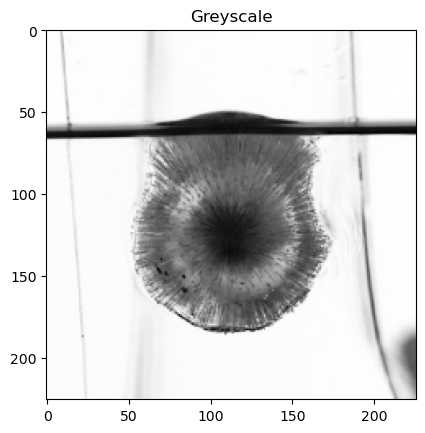

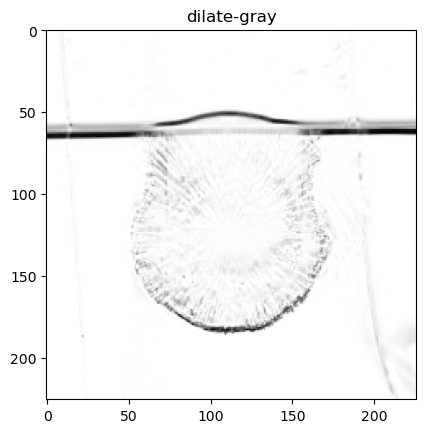

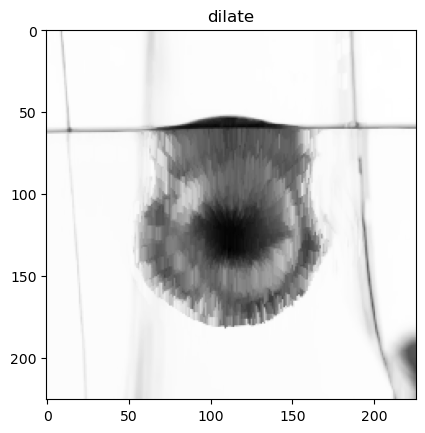

In [69]:
gray = invert(rgb2gray(imread(img)))

plt.figure()
plt.title('Greyscale')
plt.imshow(gray,cmap='Greys')
plt.show()

footpr = np.ones((8,1))
dilat = erosion(gray,footpr)

plt.figure()
plt.title('dilate-gray')
plt.imshow(dilat-gray,cmap='Greys_r')
plt.show()

plt.figure()
plt.title('dilate')
plt.imshow(dilat,cmap='Greys')
plt.show()

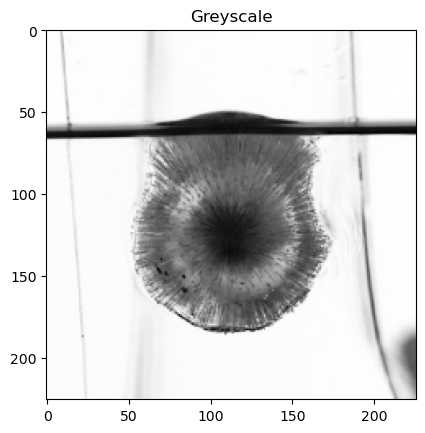

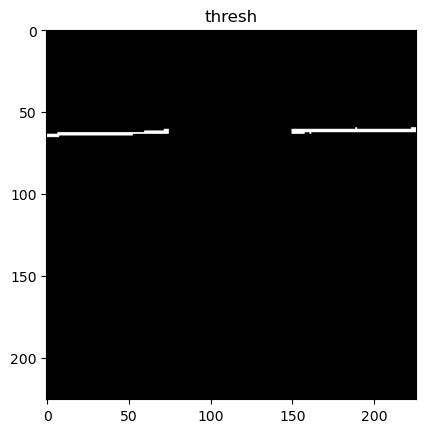

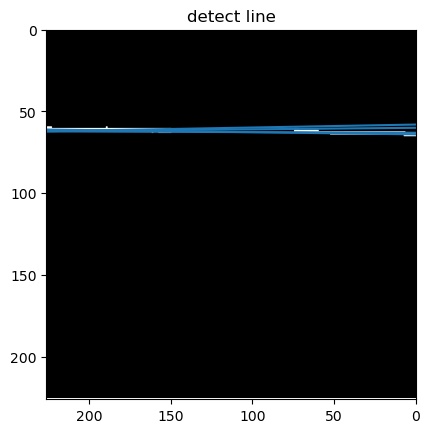

In [114]:
gray = invert(rgb2gray(imread(img)))

plt.figure()
plt.title('Greyscale')
plt.imshow(gray,cmap='Greys')
plt.show()

thresh = dilation(gray<0.75)
thresh[:,75:150] = 1

plt.figure()
plt.title('thresh')
plt.imshow(thresh,cmap='Greys')
plt.show()

# Classic straight-line Hough transform
# Set a precision of 0.5 degree.
plt.figure()
tested_angles = np.linspace(-0.1+3.14/2,0.1+3.14/2, 360, endpoint=False)
h, theta, d = hough_line(invert(thresh), theta=tested_angles)
plt.imshow(thresh, cmap='Greys')
plt.title('detect line')
plt.xlim((thresh.shape[1], 0))
plt.ylim((thresh.shape[0], 0))
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    (x0, y0) = dist * np.array([np.cos(angle), np.sin(angle)])
    plt.axline((x0, y0), slope=np.tan(angle + np.pi/2))
plt.show()

/Users/edoardo/opt/anaconda3/envs/meltingAnaconda/lib/python3.9/site-packages/skimage/_shared/utils.py:157: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)


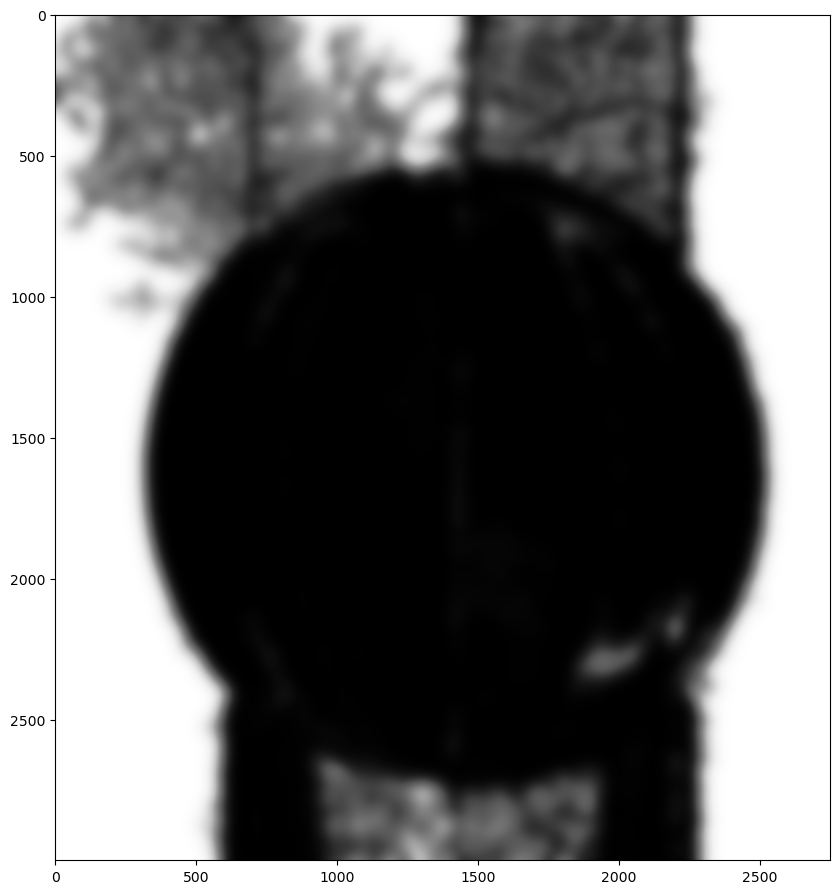

In [156]:
img32 = imread('/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/dodie/acrylic ball/2022-12-14/SGH_0032.JPG')
img33 = imread('/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/dodie/acrylic ball/2022-12-14/SGH_0033.JPG')
plt.figure(figsize=(10,16))
ball = np.array(rgb2gray(img32-img33)[1000:4000,3500:6250]*2**16).astype(int)
rmNoise = remove_small_objects(2**16-ball,min_size=2048)
rmNoise = remove_small_holes(rmNoise,area_threshold=3192)
gauss = gaussian(rmNoise,sigma=30)
plt.imshow(gauss,cmap='Greys_r')
plt.show()

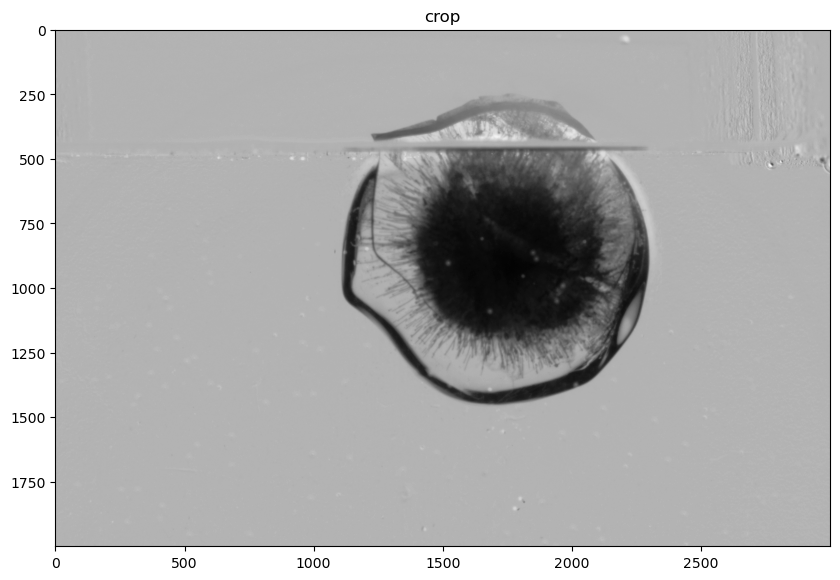

0.005600135159215691


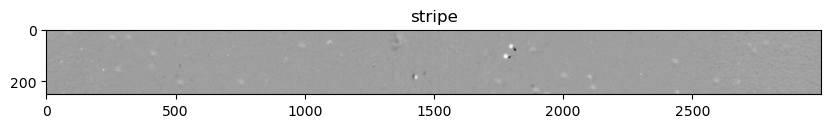

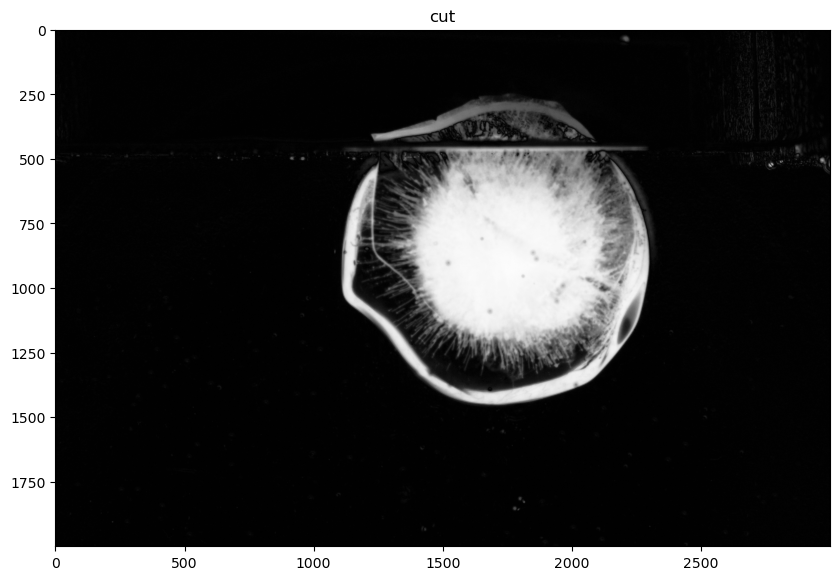

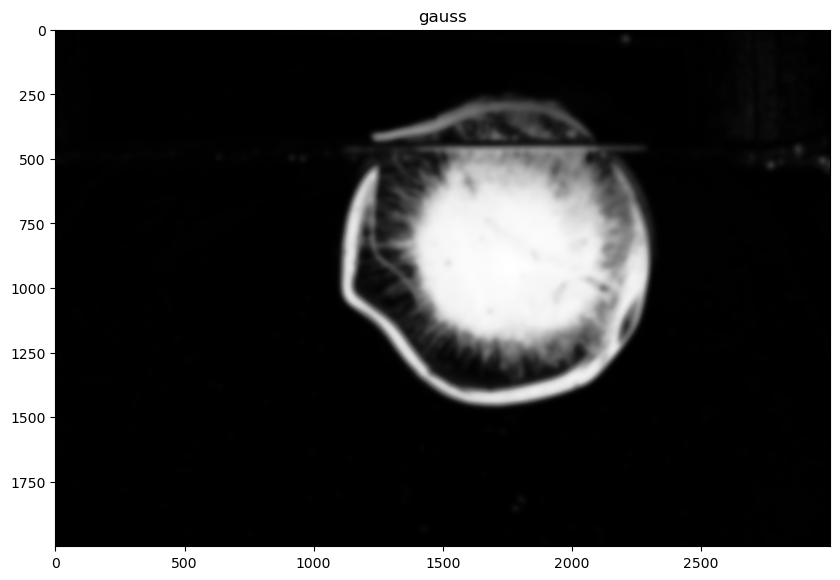

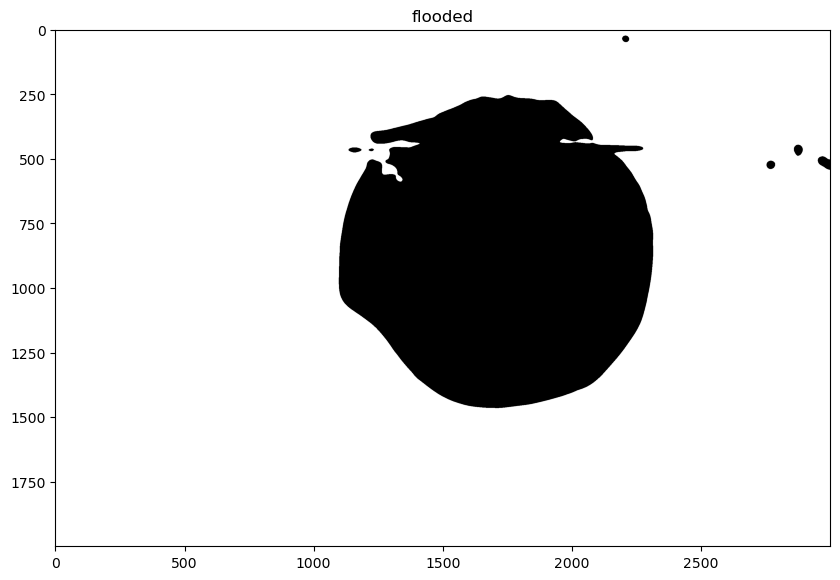

In [184]:
# GOOD ONE!!
# try to dilate and erode using a horizontal kernel

img69 = rgb2gray(rawpy.imread('/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/2023-09-07/DSC_2591.NEF').postprocess())
img70 = rgb2gray(rawpy.imread('/Users/edoardo/Library/CloudStorage/OneDrive-UniversityofTwente/floating/2023-09-07/DSC_2603.NEF').postprocess())

crop = (img69-img70)[2500:4500,3000:6000]

plt.figure(figsize=(10,16))
plt.imshow(crop, cmap='Greys_r')
plt.title('crop')
plt.show()

plt.figure(figsize=(10,16))
plt.imshow(crop[-250:,:], cmap='Greys_r')
plt.title('stripe')
avg = np.mean(crop[-250:,:])
print(avg)
plt.show()

cut = abs(crop-avg)

plt.figure(figsize=(10,16))
plt.imshow(cut, cmap='Greys_r')
plt.title('cut')
plt.show()

gauss = gaussian(cut,sigma=10)

plt.figure(figsize=(10,16))
plt.imshow(gauss, cmap='Greys_r')
plt.title('gauss')
plt.show()

flooded = flood(gauss,seed_point=(0,0),tolerance=0.07)

plt.figure(figsize=(10,16))
plt.imshow(flooded, cmap='Greys_r')
plt.title('flooded')
plt.show()

In [168]:
del flood